# Homework 3, Part 2: Matrices (25 points)

## Step 2.1: Simple image manipulation

Your task is to write a function `convert_to_grayscale(image, crop_left, crop_bottom, crop_right, crop_top, contrast_scale)` that, given a color image array, returns a grayscale, cropped, new copy of the image with increased contrast.
 
Perform the steps in the following order:

1. *Cropping*:  you should crop the image appropriately according to the `crop_left, crop_bottom, crop_right`, and `crop_top` parameters (which you can safely assume will be non-negative).


2. *Converting to grayscale*:  you should average (compute the mean) of the $(R, G, B)$ values associated with each pixel.  For example, an RGB pixel $(100, 108, 104)$ would become the single grayscale value 104.  This has the effect of reducing the dimension of the image array from 3D (x,y,channel) to 2D (x,y).


3. *Increasing contrast*:  you should first compute the *median* grayscale pixel value across the entire image.  For every pixel with value *below* the median, scale its grayscale value down by the percentage specified in `contrast_scale` (which should be a real value from 0 to 1).  For every pixel with value *above* the median, scale its grayscale value up by the percentage specified in `contrast_scale`.  A `contrast_scale` of 0 corresponds to not changing the grayscale pixel values at all.  Do not let grayscale values fall outside of the range $[0, 255]$; you may need to threshold them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# TODO: Write your image conversion function here
# Worth 12 points
def convert_to_grayscale(image, crop_left, crop_bottom, crop_right, crop_top, contrast_scale):
    image = image[crop_top:-crop_bottom, crop_left: -crop_right]
    image = image.mean(axis = 2)
    median = np.median(image)

    for i in range(len(image)):
        for j in range(len(image[i])):
            if image[i][j] > median:
                image[i][j] *= (1+contrast_scale)
                if image[i][j] > 255:
                    image[i][j] = 255
            elif image[i][j] < median:
                image[i][j] *= (1-contrast_scale)
                if image[i][j] < 0:
                    image[i][j] = 0
    return image
        

In [3]:
# Simple test
data = plt.imread('data-behind-everything.jpg')
gray_data = convert_to_grayscale(data, 10, 50, 10, 50, 0.3)


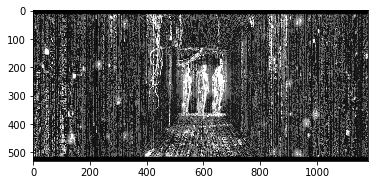

In [4]:
plt.imshow(gray_data, cmap=plt.cm.gray)

## Step 2.2 The term-document matrix

_This part is adapted from data in:_

Landauer, T. K., Foltz, P. W., \& Laham, D. (1998). An introduction to latent semantic analysis.  
_Discourse processes, 25_(2-3), 259-284.

Consider the following 5 documents on human-(c)omputer interaction and 4 documents on (m)athematical graph theory.  
We will focus on the _italicized_ words.

**c1:** _Human_ machine _interface_ for ABC _computer_ applications  
**c2:** A _survey_ of _user_ opinion of _computer system response time_  
**c3:** The _EPS user interface_ management _system_  
**c4:** _System_ and _human system_ engineering testing of _EPS_  
**c5:** Relation of _user_ perceived _response time_ to error measurement  

**m1:** The generation of random, binary, ordered _trees_  
**m2:** The intersection _graph_ of paths in _trees_  
**m3:** _Graph minors_ IV: Widths of _trees_ and well-quasi-ordering  
**m4:** _Graph minors_: A _survey_  

Generate the term-document matrix for this dataset as a Pandas DataFrame, ignoring uppercases and plurals.  
Order the words based on their first appearances in the dataset.

In [5]:
# TODO: create the docs_df DataFrame in this cell
# Worth 20 points
import pandas as pd

rows = [ 'human', 'interface','computer','survey','system',   'response','time','user','eps', 'tree','graph','minor']
cols = {
        'c1':[1,1,1,0,0, 0,0,0,0, 0,0,0],
        'c2':[0,0,1,1,1, 1,1,1,0, 0,0,0],
        'c3':[0,1,0,0,1, 0,0,1,1, 0,0,0],
        'c4':[1,0,0,0,2, 0,0,0,1, 0,0,0],
        'c5':[0,0,0,0,0, 1,1,1,0, 0,0,0],
        'm1':[0,0,0,0,0, 0,0,0,0, 1,0,0],
        'm2':[0,0,0,0,0, 0,0,0,0, 1,1,0],
        'm3':[0,0,0,0,0, 0,0,0,0, 1,1,1],
        'm4':[0,0,0,1,0, 0,0,0,0, 0,1,1],
       }
docs_df = pd.DataFrame(cols, index = rows)
docs_df

,c1,c2,c3,c4,c5,m1,m2,m3,m4
human,1,0,0,1,0,0,0,0,0
interface,1,0,1,0,0,0,0,0,0
computer,1,1,0,0,0,0,0,0,0
survey,0,1,0,0,0,0,0,0,1
system,0,1,1,2,0,0,0,0,0
response,0,1,0,0,1,0,0,0,0
time,0,1,0,0,1,0,0,0,0
user,0,1,1,0,1,0,0,0,0
eps,0,0,1,1,0,0,0,0,0
tree,0,0,0,0,0,1,1,1,0


In [6]:
if docs_df.shape != (12, 9):
    raise ValueError('unexpected dimensions')


In [7]:
if docs_df.columns[0] != "c1":
    raise ValueError('unexpected column name')


In [8]:
if docs_df.columns[1] != "c2":
    raise ValueError('unexpected column name')


In [9]:
if docs_df.columns[2] != "c3":
    raise ValueError('unexpected column name')


In [10]:
if docs_df.columns[3] != "c4":
    raise ValueError('unexpected column name')


In [11]:
if docs_df.columns[4] != "c5":
    raise ValueError('unexpected column name')


In [12]:
if docs_df.columns[5] != "m1":
    raise ValueError('unexpected column name')


In [13]:
if docs_df.columns[6] != "m2":
    raise ValueError('unexpected column name')


In [14]:
if docs_df.columns[7] != "m3":
    raise ValueError('unexpected column name')


In [15]:
if docs_df.columns[8] != "m4":
    raise ValueError('unexpected column name')


## 4.3 Matrix evaluation metrics

Write a function `matrix_eval` that returns the Frobenius norm, the determinant, the rank, the eigenvalues, and the singular values of a given matrix as a 5-tuple. If the metric is not defined, return `nan` or `[nan]` for that metric, as appropriate.

In [16]:
# TODO: write the matrix_eval function in this cell
# Worth 8 points
def square_root(list):
    return [i ** 0.5 for i in list]

def matrix_eval(A):
    frobenius_norm = np.linalg.norm(A)
    determinant = np.nan
    rank = np.nan
    eigen_values_lst = [np.nan]
    singular_values_lst = [np.nan]
    try:
        determinant = np.linalg.det(A)
    except:
        print('Cannot calculate determinant values, check: number of rows must equal to columns')
    try:
        rank = np.linalg.matrix_rank(A)
    except:
        print('Cannot calculate rank')
    try:
        eigen_values_lst = list(np.linalg.eig(A)[0])
    except:
        print('Cannot calculate eigen values, check: number of rows must equal to columns')
    try:
        singular_values_lst = square_root(list(np.linalg.eig(A.T@A)[0]))
    except:
        print('Cannot calculate singular values')
    return frobenius_norm,determinant,rank,eigen_values_lst,singular_values_lst


In [17]:
A = np.array(docs_df)
metrics = matrix_eval(A)
metrics


Cannot calculate determinant values, check: number of rows must equal to columns
Cannot calculate eigen values, check: number of rows must equal to columns


(5.5677643628300215,
 nan,
 9,
 [nan],
 [3.340883752133066,
  2.54170100004163,
  2.3539435176648396,
  1.6445322923722527,
  1.5048315504886276,
  1.3063819502352232,
  0.845903082647284,
  0.3636768400396507,
  0.5601344228392209])

In [18]:
matrix_eval(A[:9, :])


(4.795831523312719,
 0.0,
 6,
 [0j,
  0j,
  0j,
  0j,
  (-1+0j),
  (2.000000000000001+0j),
  (0.4999999999999998+0.8660254037844388j),
  (0.4999999999999998-0.8660254037844388j),
  (-1+0j)],
 [3.338857056069331,
  2.3762727890289748,
  1.6444672712431296,
  0.5516625422090227,
  1.0939639046102738,
  1.4142135623730951,
  0.0,
  0.0,
  0.0])

In [19]:
matrix_eval(A @ A.T)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


(14.594519519326424,
 0.0,
 9,
 [(11.161504245266716+0j),
  (6.46024397361261+0j),
  (5.541050084356323+0j),
  (2.7044864606551453+0j),
  (2.2645179953460084+0j),
  (1.7066337999003867+0j),
  (0.7155520252321775+0j),
  (0.313750571649427+0j),
  (0.13226084398122465+0j),
  (-1.0240289935420091e-16+2.0105829906423268e-17j),
  (-1.0240289935420091e-16-2.0105829906423268e-17j),
  (1.0166575025168485e-16+0j)],
 [11.161504245266707,
  6.460243973612613,
  5.541050084356317,
  2.70448646065514,
  2.264517995346007,
  1.7066337999003864,
  0.7155520252321742,
  0.31375057164942854,
  0.1322608439812259,
  4.200223445293349e-08,
  2.254057522434946e-08,
  nan])

In [20]:
matrix_eval(A.T @ A)


(14.594519519326424,
 124.00000000000014,
 9,
 [11.161504245266713,
  6.460243973612622,
  5.5410500843563195,
  2.704486460655137,
  2.264517995346007,
  1.706633799900385,
  0.7155520252321778,
  0.13226084398122565,
  0.31375057164942705],
 [11.161504245266705,
  6.4602439736126165,
  5.541050084356322,
  2.7044864606551435,
  2.2645179953460084,
  1.706633799900387,
  0.7155520252321745,
  0.1322608439812248,
  0.3137505716494278])

## 4.4 Matrix approximation

Write a function `approx_matrix` that approximates a matrix using the first `n` singular values, given `n`. Return the loss, defined as the Frobenius norm of the original minus the approximated version, divided by the Frobenius norm of the original.

In [21]:
# TODO: create the approx_matrix function here
# Worth 10 points
def approx_matrix(A, n):
    u, s, vh = np.linalg.svd(A)
    u = u[:,:n]
    s = np.diag(s[:n])
    vh = vh[:n]
    approxed = u @ s @ vh
    #print(A)
    #print(approxed)
    ori_norm = matrix_eval(A)[0]
    approx_norm = matrix_eval(approxed)[0]
    loss = (ori_norm - approx_norm)/ori_norm
    return loss


In [22]:
# import numpy as np
# Test = np.array([[1,1,1,0,0],[3,3,3,0,0],[4,4,4,0,0],[5,5,5,0,0],[0,2,0,4,4],[0,0,0,5,5],[0,1,0,2,2]])
# # u,s,vh = np.linalg.svd(Test)
# print(u[:,:3])
# print(s[:3])
# print(vh[:3])

In [23]:
simple = np.array([[1,2],[3,4]])
approx_matrix(simple, 1)


0.0022346844519915768

In [24]:
approx_matrix(simple, 2)


-1.6215845185301646e-16